Packages

In [2]:
# base tools
import os, sys
#sys.path.append(os.path.join(".."))

# data analysis
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm # gives a progress bar which is nice and easy to understand. 

# tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import (load_img, 
                                                  img_to_array)
from tensorflow.keras.applications.vgg16 import (VGG16, 
                                                 preprocess_input)
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# utils feature extraction
import sys
sys.path.append("..") #"." for .py
import utils.features as fe


2023-05-17 11:59:07.476550: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Helperfunction (Ross') -> extract features from images

In [3]:
def extract_features(img_path, model):
    """
    Extract features from image data using pretrained model (e.g. VGG16)
    """
    # Define input image shape - remember we need to reshape
    input_shape = (224, 224, 3) # the shape is set to match the images in the "Cultural Heritage Dataset"
    # load image from file path
    img = load_img(img_path, target_size=(input_shape[0], 
                                          input_shape[1]))
    # convert to array
    img_array = img_to_array(img)
    # expand to fit dimensions
    expanded_img_array = np.expand_dims(img_array, axis=0)
    # preprocess image - see last week's notebook
    preprocessed_img = preprocess_input(expanded_img_array)
    # use the predict function to create feature representation
    features = model.predict(preprocessed_img)
    # flatten
    flattened_features = features.flatten()
    # normalise features
    normalized_features = flattened_features / norm(features) # norm is from numpy --> a slightly more sophisticated type of normalization than just deviding by 255 (but the latter could also be done). 
    return normalized_features

Load VGG16

In [4]:
# load VGG16
model = VGG16(weights='imagenet', 
              include_top=False, # Fals = doesn't include classifier layer
              pooling='avg',
              input_shape=(224, 224, 3))

In [5]:
#path to the whole datasets
root_dir = os.path.join("..", "in", "Orthodox_Churches", "Frescoes")
filenames = [root_dir+"/"+name for name in sorted(os.listdir(root_dir))]

In [6]:
# create list of features
feature_list = []
for i in tqdm(range(len(filenames)), position=0, leave=True):
    feature_list.append(extract_features(filenames[i], model))

  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 294ms/step


  0%|          | 1/200 [00:00<01:10,  2.83it/s]

1/1 [==============================] - 0s 162ms/step


  1%|          | 2/200 [00:00<00:53,  3.70it/s]

1/1 [==============================] - 0s 137ms/step


  2%|▏         | 3/200 [00:00<00:45,  4.35it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 4/200 [00:00<00:41,  4.67it/s]

1/1 [==============================] - 0s 77ms/step


  2%|▎         | 5/200 [00:01<00:34,  5.62it/s]

1/1 [==============================] - 0s 151ms/step


  3%|▎         | 6/200 [00:01<00:35,  5.52it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▎         | 7/200 [00:01<00:30,  6.36it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 8/200 [00:01<00:32,  5.92it/s]

1/1 [==============================] - 0s 82ms/step


  4%|▍         | 9/200 [00:01<00:29,  6.56it/s]

1/1 [==============================] - 0s 153ms/step


  5%|▌         | 10/200 [00:01<00:31,  6.11it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 11/200 [00:01<00:27,  6.80it/s]

1/1 [==============================] - 0s 158ms/step


  6%|▌         | 12/200 [00:02<00:30,  6.22it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▋         | 13/200 [00:02<00:31,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 14/200 [00:02<00:28,  6.59it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 15/200 [00:02<00:30,  6.15it/s]

1/1 [==============================] - 0s 75ms/step


  8%|▊         | 16/200 [00:02<00:27,  6.78it/s]

1/1 [==============================] - 0s 75ms/step


  8%|▊         | 17/200 [00:02<00:25,  7.27it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 18/200 [00:03<00:27,  6.58it/s]

1/1 [==============================] - 0s 145ms/step


 10%|▉         | 19/200 [00:03<00:29,  6.20it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 20/200 [00:03<00:27,  6.66it/s]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 21/200 [00:03<00:28,  6.23it/s]

1/1 [==============================] - 0s 77ms/step


 11%|█         | 22/200 [00:03<00:26,  6.83it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 23/200 [00:03<00:28,  6.32it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 24/200 [00:03<00:25,  6.90it/s]

1/1 [==============================] - 0s 161ms/step


 12%|█▎        | 25/200 [00:04<00:28,  6.23it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 26/200 [00:04<00:29,  5.85it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▎        | 27/200 [00:04<00:30,  5.64it/s]

1/1 [==============================] - 0s 78ms/step


 14%|█▍        | 28/200 [00:04<00:27,  6.26it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▍        | 29/200 [00:04<00:28,  5.96it/s]

1/1 [==============================] - 0s 138ms/step


 15%|█▌        | 30/200 [00:05<00:29,  5.70it/s]

1/1 [==============================] - 0s 76ms/step


 16%|█▌        | 31/200 [00:05<00:27,  6.25it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 32/200 [00:05<00:28,  5.98it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▋        | 33/200 [00:05<00:25,  6.68it/s]

1/1 [==============================] - 0s 153ms/step


 17%|█▋        | 34/200 [00:05<00:26,  6.18it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 35/200 [00:05<00:24,  6.83it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 36/200 [00:05<00:26,  6.24it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 37/200 [00:06<00:23,  6.86it/s]

1/1 [==============================] - 0s 166ms/step


 19%|█▉        | 38/200 [00:06<00:26,  6.15it/s]

1/1 [==============================] - 0s 147ms/step


 20%|█▉        | 39/200 [00:06<00:27,  5.81it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 40/200 [00:06<00:28,  5.69it/s]

1/1 [==============================] - 0s 76ms/step


 20%|██        | 41/200 [00:06<00:24,  6.37it/s]

1/1 [==============================] - 0s 152ms/step


 21%|██        | 42/200 [00:06<00:26,  5.93it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 43/200 [00:07<00:23,  6.65it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 44/200 [00:07<00:25,  6.14it/s]

1/1 [==============================] - 0s 151ms/step


 22%|██▎       | 45/200 [00:07<00:26,  5.85it/s]

1/1 [==============================] - 0s 77ms/step


 23%|██▎       | 46/200 [00:07<00:23,  6.45it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▎       | 47/200 [00:07<00:25,  6.04it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 48/200 [00:07<00:22,  6.68it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▍       | 49/200 [00:08<00:24,  6.16it/s]

1/1 [==============================] - 0s 155ms/step


 25%|██▌       | 50/200 [00:08<00:25,  5.85it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 51/200 [00:08<00:22,  6.54it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 52/200 [00:08<00:24,  6.12it/s]

1/1 [==============================] - 0s 140ms/step


 26%|██▋       | 53/200 [00:08<00:25,  5.76it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 54/200 [00:08<00:22,  6.45it/s]

1/1 [==============================] - 0s 143ms/step


 28%|██▊       | 55/200 [00:09<00:24,  6.04it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 56/200 [00:09<00:21,  6.63it/s]

1/1 [==============================] - 0s 145ms/step


 28%|██▊       | 57/200 [00:09<00:23,  6.15it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██▉       | 58/200 [00:09<00:24,  5.86it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 59/200 [00:09<00:21,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 30%|███       | 60/200 [00:09<00:23,  6.05it/s]

1/1 [==============================] - 0s 144ms/step


 30%|███       | 61/200 [00:10<00:24,  5.74it/s]

1/1 [==============================] - 0s 153ms/step


 31%|███       | 62/200 [00:10<00:25,  5.48it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 63/200 [00:10<00:22,  6.11it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 64/200 [00:10<00:23,  5.87it/s]

1/1 [==============================] - 0s 149ms/step


 32%|███▎      | 65/200 [00:10<00:24,  5.61it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 66/200 [00:10<00:21,  6.24it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▎      | 67/200 [00:11<00:22,  5.93it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 68/200 [00:11<00:19,  6.67it/s]

1/1 [==============================] - 0s 155ms/step


 34%|███▍      | 69/200 [00:11<00:21,  6.18it/s]

1/1 [==============================] - 0s 143ms/step


 35%|███▌      | 70/200 [00:11<00:22,  5.83it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 71/200 [00:11<00:19,  6.47it/s]

1/1 [==============================] - 0s 155ms/step


 36%|███▌      | 72/200 [00:11<00:21,  6.03it/s]

1/1 [==============================] - 0s 144ms/step


 36%|███▋      | 73/200 [00:12<00:21,  5.80it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 74/200 [00:12<00:19,  6.51it/s]

1/1 [==============================] - 0s 83ms/step


 38%|███▊      | 75/200 [00:12<00:17,  6.99it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 76/200 [00:12<00:19,  6.38it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 77/200 [00:12<00:20,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███▉      | 78/200 [00:12<00:18,  6.59it/s]

1/1 [==============================] - 0s 151ms/step


 40%|███▉      | 79/200 [00:12<00:19,  6.14it/s]

1/1 [==============================] - 0s 76ms/step


 40%|████      | 80/200 [00:13<00:17,  6.74it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 81/200 [00:13<00:18,  6.30it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 82/200 [00:13<00:17,  6.71it/s]

1/1 [==============================] - 0s 137ms/step


 42%|████▏     | 83/200 [00:13<00:18,  6.35it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 84/200 [00:13<00:19,  6.02it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▎     | 85/200 [00:13<00:17,  6.72it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████▎     | 86/200 [00:13<00:15,  7.25it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▎     | 87/200 [00:14<00:17,  6.56it/s]

1/1 [==============================] - 0s 155ms/step


 44%|████▍     | 88/200 [00:14<00:18,  5.99it/s]

1/1 [==============================] - 0s 75ms/step


 44%|████▍     | 89/200 [00:14<00:16,  6.63it/s]

1/1 [==============================] - 0s 154ms/step


 45%|████▌     | 90/200 [00:14<00:17,  6.15it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▌     | 91/200 [00:14<00:18,  5.80it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▌     | 92/200 [00:14<00:16,  6.45it/s]

1/1 [==============================] - 0s 152ms/step


 46%|████▋     | 93/200 [00:15<00:17,  6.04it/s]

1/1 [==============================] - 0s 78ms/step


 47%|████▋     | 94/200 [00:15<00:15,  6.66it/s]

1/1 [==============================] - 0s 151ms/step


 48%|████▊     | 95/200 [00:15<00:16,  6.22it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 96/200 [00:15<00:15,  6.78it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 97/200 [00:15<00:16,  6.27it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 98/200 [00:15<00:17,  5.95it/s]

1/1 [==============================] - 0s 73ms/step


 50%|████▉     | 99/200 [00:16<00:15,  6.57it/s]

1/1 [==============================] - 0s 148ms/step


 50%|█████     | 100/200 [00:16<00:16,  6.13it/s]

1/1 [==============================] - 0s 77ms/step


 50%|█████     | 101/200 [00:16<00:14,  6.73it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 102/200 [00:16<00:15,  6.24it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 103/200 [00:16<00:14,  6.87it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 104/200 [00:16<00:15,  6.34it/s]

1/1 [==============================] - 0s 81ms/step


 52%|█████▎    | 105/200 [00:16<00:13,  6.86it/s]

1/1 [==============================] - 0s 152ms/step


 53%|█████▎    | 106/200 [00:17<00:14,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 54%|█████▎    | 107/200 [00:17<00:13,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▍    | 108/200 [00:17<00:14,  6.36it/s]

1/1 [==============================] - 0s 71ms/step


 55%|█████▍    | 109/200 [00:17<00:13,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 110/200 [00:17<00:14,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 111/200 [00:17<00:12,  7.02it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▌    | 112/200 [00:18<00:13,  6.43it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████▋    | 113/200 [00:18<00:12,  7.04it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 114/200 [00:18<00:13,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▊    | 115/200 [00:18<00:12,  7.00it/s]

1/1 [==============================] - 0s 144ms/step


 58%|█████▊    | 116/200 [00:18<00:13,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 117/200 [00:18<00:11,  7.05it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 118/200 [00:18<00:12,  6.42it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 119/200 [00:19<00:11,  7.02it/s]

1/1 [==============================] - 0s 141ms/step


 60%|██████    | 120/200 [00:19<00:12,  6.45it/s]

1/1 [==============================] - 0s 78ms/step


 60%|██████    | 121/200 [00:19<00:11,  7.04it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 122/200 [00:19<00:10,  7.55it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 123/200 [00:19<00:11,  6.74it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 124/200 [00:19<00:10,  7.28it/s]

1/1 [==============================] - 0s 147ms/step


 62%|██████▎   | 125/200 [00:19<00:11,  6.53it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 126/200 [00:20<00:10,  7.11it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▎   | 127/200 [00:20<00:11,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 64%|██████▍   | 128/200 [00:20<00:10,  7.05it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 129/200 [00:20<00:11,  6.41it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▌   | 130/200 [00:20<00:09,  7.09it/s]

1/1 [==============================] - 0s 147ms/step


 66%|██████▌   | 131/200 [00:20<00:10,  6.46it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████▌   | 132/200 [00:20<00:09,  7.05it/s]

1/1 [==============================] - 0s 149ms/step


 66%|██████▋   | 133/200 [00:21<00:10,  6.45it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 134/200 [00:21<00:09,  6.98it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 135/200 [00:21<00:10,  6.43it/s]

1/1 [==============================] - 0s 76ms/step


 68%|██████▊   | 136/200 [00:21<00:09,  7.03it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████▊   | 137/200 [00:21<00:08,  7.51it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▉   | 138/200 [00:21<00:09,  6.65it/s]

1/1 [==============================] - 0s 74ms/step


 70%|██████▉   | 139/200 [00:21<00:08,  7.29it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 140/200 [00:22<00:09,  6.56it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 141/200 [00:22<00:08,  7.18it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 142/200 [00:22<00:08,  6.54it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 143/200 [00:22<00:09,  5.98it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 144/200 [00:22<00:08,  6.52it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▎  | 145/200 [00:22<00:09,  6.08it/s]

1/1 [==============================] - 0s 143ms/step


 73%|███████▎  | 146/200 [00:23<00:09,  5.80it/s]

1/1 [==============================] - 0s 72ms/step


 74%|███████▎  | 147/200 [00:23<00:08,  6.35it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 148/200 [00:23<00:08,  6.02it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▍  | 149/200 [00:23<00:07,  6.68it/s]

1/1 [==============================] - 0s 147ms/step


 75%|███████▌  | 150/200 [00:23<00:08,  6.23it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 151/200 [00:23<00:08,  5.85it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▌  | 152/200 [00:24<00:07,  6.54it/s]

1/1 [==============================] - 0s 164ms/step


 76%|███████▋  | 153/200 [00:24<00:07,  5.96it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 154/200 [00:24<00:08,  5.74it/s]

1/1 [==============================] - 0s 83ms/step


 78%|███████▊  | 155/200 [00:24<00:07,  6.34it/s]

1/1 [==============================] - 0s 148ms/step


 78%|███████▊  | 156/200 [00:24<00:07,  6.03it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 157/200 [00:24<00:06,  6.75it/s]

1/1 [==============================] - 0s 145ms/step


 79%|███████▉  | 158/200 [00:25<00:06,  6.21it/s]

1/1 [==============================] - 0s 73ms/step


 80%|███████▉  | 159/200 [00:25<00:05,  6.87it/s]

1/1 [==============================] - 0s 145ms/step


 80%|████████  | 160/200 [00:25<00:06,  6.34it/s]

1/1 [==============================] - 0s 73ms/step


 80%|████████  | 161/200 [00:25<00:05,  6.84it/s]

1/1 [==============================] - 0s 149ms/step


 81%|████████  | 162/200 [00:25<00:06,  6.32it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████▏ | 163/200 [00:25<00:05,  6.99it/s]

1/1 [==============================] - 0s 145ms/step


 82%|████████▏ | 164/200 [00:25<00:05,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▎ | 165/200 [00:26<00:05,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 83%|████████▎ | 166/200 [00:26<00:05,  6.32it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▎ | 167/200 [00:26<00:04,  6.98it/s]

1/1 [==============================] - 0s 152ms/step


 84%|████████▍ | 168/200 [00:26<00:04,  6.40it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████▍ | 169/200 [00:26<00:04,  7.05it/s]

1/1 [==============================] - 0s 152ms/step


 85%|████████▌ | 170/200 [00:26<00:04,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▌ | 171/200 [00:26<00:04,  7.00it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▌ | 172/200 [00:27<00:04,  6.40it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▋ | 173/200 [00:27<00:03,  6.97it/s]

1/1 [==============================] - 0s 153ms/step


 87%|████████▋ | 174/200 [00:27<00:04,  6.37it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 175/200 [00:27<00:03,  6.98it/s]

1/1 [==============================] - 0s 155ms/step


 88%|████████▊ | 176/200 [00:27<00:03,  6.36it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 177/200 [00:27<00:03,  6.99it/s]

1/1 [==============================] - 0s 148ms/step


 89%|████████▉ | 178/200 [00:28<00:03,  6.39it/s]

1/1 [==============================] - 0s 76ms/step


 90%|████████▉ | 179/200 [00:28<00:03,  6.82it/s]

1/1 [==============================] - 0s 103ms/step


 90%|█████████ | 180/200 [00:28<00:03,  6.37it/s]

1/1 [==============================] - 0s 84ms/step


 90%|█████████ | 181/200 [00:28<00:02,  6.84it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████ | 182/200 [00:28<00:02,  6.40it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 183/200 [00:28<00:02,  7.01it/s]

1/1 [==============================] - 0s 153ms/step


 92%|█████████▏| 184/200 [00:28<00:02,  6.40it/s]

1/1 [==============================] - 0s 137ms/step


 92%|█████████▎| 185/200 [00:29<00:02,  6.02it/s]

1/1 [==============================] - 0s 79ms/step


 93%|█████████▎| 186/200 [00:29<00:02,  6.67it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▎| 187/200 [00:29<00:01,  7.19it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 188/200 [00:29<00:01,  6.53it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▍| 189/200 [00:29<00:01,  7.14it/s]

1/1 [==============================] - 0s 154ms/step


 95%|█████████▌| 190/200 [00:29<00:01,  6.46it/s]

1/1 [==============================] - 0s 76ms/step


 96%|█████████▌| 191/200 [00:29<00:01,  7.07it/s]

1/1 [==============================] - 0s 151ms/step


 96%|█████████▌| 192/200 [00:30<00:01,  6.42it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▋| 193/200 [00:30<00:01,  6.98it/s]

1/1 [==============================] - 0s 144ms/step


 97%|█████████▋| 194/200 [00:30<00:00,  6.39it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 195/200 [00:30<00:00,  6.99it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 196/200 [00:30<00:00,  6.39it/s]

1/1 [==============================] - 0s 138ms/step


 98%|█████████▊| 197/200 [00:30<00:00,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 198/200 [00:31<00:00,  6.62it/s]

1/1 [==============================] - 0s 142ms/step


100%|█████████▉| 199/200 [00:31<00:00,  6.15it/s]

1/1 [==============================] - 0s 75ms/step


100%|██████████| 200/200 [00:31<00:00,  6.38it/s]


In [7]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, 
                             algorithm='brute',
                             metric='cosine').fit(feature_list)

In [8]:
distances, indices = neighbors.kneighbors([feature_list[149]]) # features from image number 149.

In [9]:
# return list of the five closest images (excluding the image itself)
most_similar = []
for i in range(1,6):
    dis = distances[0][i]
    ind = indices[0][i]
    print(distances[0][i], indices[0][i])
    most_similar.append(indices[0][i])

0.24944997 86
0.24989378 31
0.26896286 124
0.27435952 74
0.27937 73


In [10]:
# Save list of the five closest images in out (as in assignment 1)
import pandas as pd
most_similar_df = pd.DataFrame(most_similar)
df_path = os.path.join("..", "out", "distance_metrix.csv")
most_similar_df.to_csv(df_path, index=False)

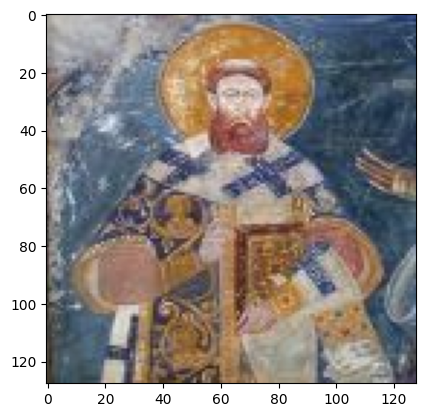

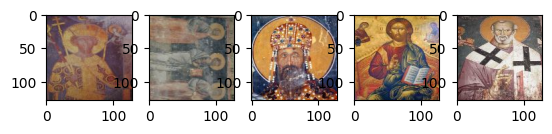

In [11]:
#Save plots

# plt target image
plt.imshow(mpimg.imread(filenames[149]))
outpath = os.path.join("..", "out", "target_image.png")
plt.savefig(outpath)

# plot 5 most similar images
f, axarr = plt.subplots(1,5)
axarr[0].imshow(mpimg.imread(filenames[most_similar[0]]))
axarr[1].imshow(mpimg.imread(filenames[most_similar[1]]))
axarr[2].imshow(mpimg.imread(filenames[most_similar[2]]))
axarr[3].imshow(mpimg.imread(filenames[most_similar[3]]))
axarr[4].imshow(mpimg.imread(filenames[most_similar[4]]))

outpath = os.path.join("..", "out", "similar_images.png")
plt.savefig(outpath)

## Image Classifier

In [12]:
# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Try to classify AND do visualisation using heat map

In [13]:
#feature map
sys.path.append(".")
# neural networks with numpy
from utils.imutils import jimshow

# image processing
import cv2

# tensorflow
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image

Load VGG16 model

In [16]:
# load model
#model = VGG16()

#model.summary()

553467096/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

Reading the data set (guide)

In [14]:
# path to image directory
#data_dir = os.path.join("..", "in", "Orthodox_Churches")
data_path = "../in/Orthodox_Churches/"

In [41]:
# list all labels/classes
class_label = ["Chandelier","Dome","Frescoes","Lunette"]

In [16]:
# create data frame of image path and label
import pandas as pd
import os
img_list = []
label_list = []
for label in class_label:
    for img_file in os.listdir(data_path+label): # loop through all subfolders
        img_list.append(data_path+label+'/'+img_file) # add file location of all images to img_list
        label_list.append(label) # add label based on subfolder name
        
df = pd.DataFrame({'img':img_list, 'label':label_list}) # create data frame

Data exploration (guide)

In [17]:
df['label'].value_counts()

label
Chandelier    200
Dome          200
Frescoes      200
Lunette       200
Name: count, dtype: int64

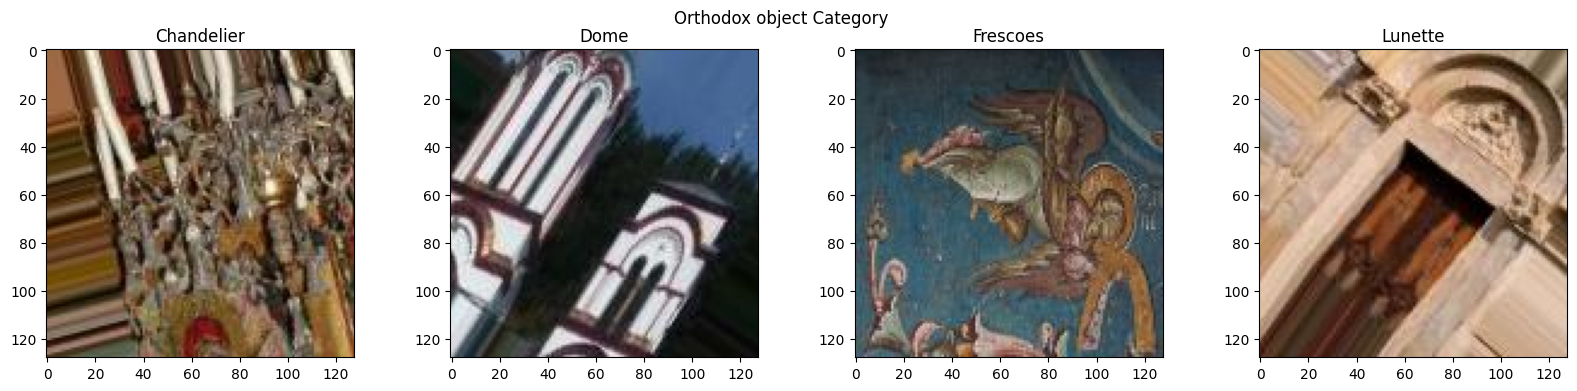

In [18]:
# Show random image examples from each class

import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=len(class_label), figsize=(20,4))
fig.suptitle('Orthodox object Category')
random_num = 12
for i,label in enumerate(class_label):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['label']==label]['img'].iloc[random_num]))

In [19]:
# check image shape
plt.imread(df['img'][0]).shape

(128, 128, 3)

Data preprocessing (guide)

In [20]:
# Create a dataframe for mapping label
df_labels = { # create dictionary with labels as numbers
    "Chandelier" : 0,
    "Dome" : 1,
    "Frescoes" : 2,
    "Lunette" : 3
}
# Encode
df['encode_label'] = df['label'].map(df_labels)
df.head()

,img,label,encode_label
0,../in/Orthodox_Churches/Chandelier/chandelier1...,Chandelier,0
1,../in/Orthodox_Churches/Chandelier/chandelier2...,Chandelier,0
2,../in/Orthodox_Churches/Chandelier/chandelier_...,Chandelier,0
3,../in/Orthodox_Churches/Chandelier/chandelier5...,Chandelier,0
4,../in/Orthodox_Churches/Chandelier/chandelier4...,Chandelier,0


In [205]:
# ## GUIDE
# Prepare training data set
import cv2
#X = []
#for img in df['img']:
#    img = cv2.imread(str(img))
#    # img = augment_function(img)
#    img = cv2.resize(img, (96, 96))
#    img = img/255
#    X.append(img)

#y = df['encode_label']

### From chat gpt

# Prepare training data set 
X = []
y = []
for img, label in zip(df['img'], df['encode_label']):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (96, 96))
    img = img / 255.0
    X.append(img)
    y.append(label)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

In [206]:
# train-validation-test split
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# the split is train 80%, validation for model tuning 4%, test set 16%

Create a model (guide)

In [299]:
## GUIDE way
from keras.applications.vgg16 import VGG16

#base_model = VGG16(input_shape=(96,96,3), include_top=False, weights='imagenet') # set image size to match size of images in dataset
#base_model.summary()

### ROSSs way
# load model without classifier layers
model = VGG16(include_top=False, # the top layer is the classification part, which we don't want
              pooling='avg', # put in an average pooling layer instead of the classification layer
              input_shape=(96, 96, 3)) # change the way the model works so it can take images of the size which orthodox images have.

In [300]:
### GUIDE way
# freeze model parameters (now only parameters in last layer can be adjusted)
#for layer in base_model.layers:
#    layer.trainable = False
#base_model.layers[-2].trainable = True
#base_model.layers[-3].trainable = True
#base_model.layers[-4].trainable = True

### ROSS way
# mark loaded layers as not trainable
for layer in model.layers: 
    layer.trainable = False # False = for each layer in the model, freeze all the weights (som they aren't trainable any more).

In [301]:
### GUIDE way
# add layers to model
#from tensorflow.keras.models import *
#from tensorflow.keras.layers import *
#model = Sequential()
#model.add(Input(shape=(96,96,3)))
#model.add(base_model)
#model.add(Flatten())
#model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(len(class_label), activation='softmax'))
#model.summary()
# As you can see in the model summary, VGG16 is the starting point. Then, layers Flatten, Dropout, and Dense are added

#### ROSS' way
tf.keras.backend.clear_session()

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output) # layer that flattenes the data
class1 = Dense(128, activation='relu')(flat1) # our first classification layer
output = Dense(4, activation='softmax')(class1) # output layer with predictions

# define new model
model = Model(inputs=model.inputs, 
              outputs=output)
# summarize
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [302]:
### GUide way
# Train the model!
model.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

## ROSS's way - compile model
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=0.01,  
#    decay_steps=10000, 
#    decay_rate=0.9) 
#sgd = SGD(learning_rate=lr_schedule)

#model.compile(optimizer=sgd,
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])


# train model - model is fitted to the training data
#H = model.fit(X_train, y_train, 
#            validation_split=0.1,
#            batch_size=128,
#            epochs=10,
#            verbose=1)

Epoch 1/5
19/19 [==============================] - 10s 511ms/step - loss: 1.0185 - acc: 0.5900 - val_loss: 0.5862 - val_acc: 0.9000
Epoch 2/5
19/19 [==============================] - 9s 505ms/step - loss: 0.4626 - acc: 0.8800 - val_loss: 0.4180 - val_acc: 0.8000
Epoch 3/5
19/19 [==============================] - 9s 501ms/step - loss: 0.3140 - acc: 0.9000 - val_loss: 0.3056 - val_acc: 0.8800
Epoch 4/5
19/19 [==============================] - 9s 490ms/step - loss: 0.2319 - acc: 0.9350 - val_loss: 0.2230 - val_acc: 0.9600
Epoch 5/5
19/19 [==============================] - 9s 490ms/step - loss: 0.1837 - acc: 0.9617 - val_loss: 0.1986 - val_acc: 0.9400


In [303]:
# evaluate
model.evaluate(X_test,y_test)

5/5 [==============================] - 2s 426ms/step - loss: 0.1964 - acc: 0.9400


[0.19643299281597137, 0.9399999976158142]

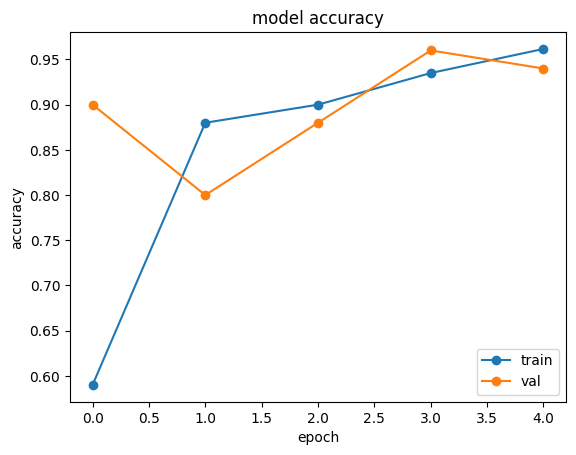

In [304]:
# plot evaluation
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

__Back to notebook 12__

Preprocess and predict

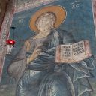

In [305]:
# file path
filepath = os.path.join("..", "in", "Orthodox_Churches", "Frescoes", "fresco_6.jpg")

# load image
img = load_img(filepath, target_size=(96, 96))

# display image
img

In [306]:
# convert the image pixels to a numpy array
image = img_to_array(img)

# convert to rank 4 tensor
image = np.expand_dims(image, axis=0)

# reshape data for the model
#image = image.reshape((image.shape[0], image.shape[1], image.shape[2])) #the extra dimension "sample" (here 1) is added to make it 4D
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) #the extra dimension "sample" (here 1) is added to make it 4D

# prepare the image for the VGG model (Ross is not sure why we have to do this, but we do)
image = preprocess_input(image)

image.shape


(1, 96, 96, 3)

In [307]:
from keras.utils import to_categorical
# Convert y_test to one-hot encoded vectors
num_classes = 4  # Replace with the actual number of classes in your classification problem
y_test_encoded = to_categorical(y_test, num_classes)

In [308]:
#from keras.applications.vgg16 import VGG16, decode_predictions

# Decode predictions
#label = decode_predictions(predictions, top=3)
#print(decoded_predictions)

predictions = model.predict(X_test, batch_size=128)
# get prediction from target image
print(img_prediction)


2/2 [==============================] - 2s 396ms/step
[[0. 0. 1. 0.]]


In [309]:
# turn prediction from float into integer
prediction_int =  img_prediction.astype(int)

# get the predicted label
predicted_class_index = np.argmax(prediction_int)
img_label = class_label[predicted_class_index]

print(img_label)

Frescoes


In [310]:
# classification report
print(classification_report(y_test_encoded.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=class_label))

              precision    recall  f1-score   support

  Chandelier       1.00      0.88      0.94        41
        Dome       1.00      0.94      0.97        36
    Frescoes       0.82      0.97      0.89        32
     Lunette       0.95      0.98      0.96        41

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



In [195]:
# Save classification_report

Heatmap thing :)

In [311]:
with tf.GradientTape() as tape:
    # make sure the name here corresponds to the final conv layer in your network
    last_conv_layer = model.get_layer("block3_conv3")
    
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions    
    iterate = tf.keras.models.Model([model.inputs], 
                                    [model.output, last_conv_layer.output])
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    model_out, last_conv_layer_out = iterate(image)
    #model_out, last_conv_layer = iterate(image) #ROSS
    #class_out = model_out[:, np.argmax(prediction_int)]
    class_out = model_out[:, np.argmax(model_out[0])] #ROSS
    
    # This is the gradient of the output neuron of the last conv layer
    #grads = tape.gradient(class_out, last_conv_layer) #ROSS
    grads = tape.gradient(class_out, last_conv_layer_out)


    # Vector of mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, 
                          axis=(0, 1, 2)) #ROSS
    #pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    #pooled_grads = tf.reduce_mean(tf.reshape(grads, (1, last_conv_layer.shape[1], last_conv_layer.shape[2], last_conv_layer.shape[3])), axis=(1, 2))
    
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_out), 
                            axis=-1)
    #heatmap = tf.reshape(pooled_grads, (1, last_conv_layer_out.shape[1], last_conv_layer_out.shape[2]))

TypeError: Invalid shape (1, 24, 24) for image data

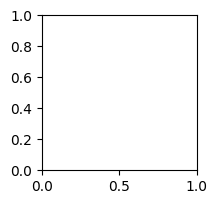

In [312]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Display the heatmap
plt.matshow(heatmap)
plt.show()

In [313]:
# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
#heatmap = heatmap.reshape((8,8))

# Display the heatmap
#plt.matshow(heatmap)
#plt.show()

#ROSS
#heatmap = np.maximum(heatmap, 0)
#heatmap /= np.max(heatmap)
#heatmap = heatmap.reshape((14,14)) # a very small vis, where everything is compressed down to 14x14 pixels. 
#plt.matshow(heatmap)
#plt.show()

# The areas in yellow are the areas mostly used to predict the class of the image. 


Better visualisation with OpenCV

In [314]:
# Load the original image
img = cv2.imread(filepath)

# heatmap should be semi transparent
intensity = 0.5

# resize the heatmap to be the original dimensions of the input 
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# https://docs.opencv.org/master/d3/d50/group__imgproc__colormap.html
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

# multiply heatmap by intensity and 'add' this on top of the original image
superimposed = (heatmap * intensity) + img

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/colormap.cpp:736: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


In [280]:
cv2.imwrite("../out/heatmap.jpg", superimposed)

True